In [1]:
import numpy as np
import pandas as pd

# 7.1 处理缺失数据

对于数值数据，pandas使用浮点值NaN（Not a Number）表示缺失数据。我们称其为哨兵值，可以方便的检测出来：

In [2]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

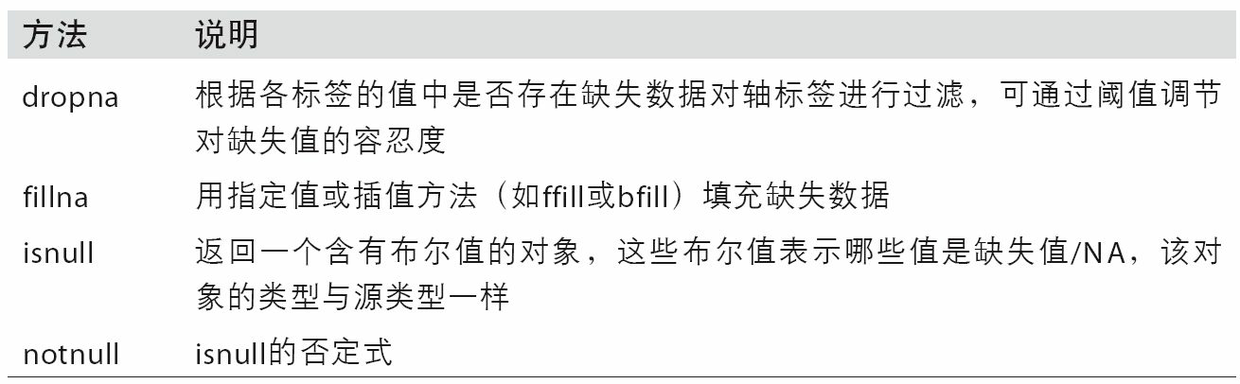

## 滤除缺失数据

In [3]:
#过滤掉缺失数据的办法有很多种。你可以通过pandas.isnull或布尔索引的手工方法，但dropna可能会更实用一些。
#对于一个Series，dropna返回一个仅含非空数据和索引值的Series：
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()
#等价于data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [4]:
#对于DataFrame对象  dropna默认丢弃任何含有缺失值的行：
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [5]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


In [6]:
#传入how='all'将只丢弃全为NA的那些行：
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [7]:
#用这种方式丢弃列，只需传入axis=1即可：
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [10]:
data=data.dropna(axis=1,how="all")
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [11]:
#阈值threshold，大于等于2的NA所在的行被drop
data.dropna(thresh=2)

,0,1,2
0,1.0,6.5,3.0
3,NaN,6.5,3.0


## 填充缺失数据

In [12]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data.fillna(0)

,0,1,2
0,1.0,6.5,3.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,6.5,3.0


In [13]:
#若是通过一个字典调用fillna，就可以实现对不同的列填充不同的值：
data.fillna({0:0,1: 0.5, 2: 1})

,0,1,2
0,1.0,6.5,3.0
1,1.0,0.5,1.0
2,0.0,0.5,1.0
3,0.0,6.5,3.0


In [14]:
#fillna默认会返回新对象，但也可以对现有对象进行就地修改：
_ = data.fillna(0, inplace=True)

In [15]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df.fillna(method='ffill', limit=2)

,0,1,2
0,-1.151937,-0.355739,1.233051
1,-0.562023,-0.581890,0.478505
2,2.635363,-0.581890,0.123160
3,0.990449,-0.581890,0.429765
4,0.415565,NaN,0.429765
5,0.351913,NaN,0.429765


In [16]:
#你可以传入Series的平均值或中位数：
data = pd.Series([1., NA, 3.5, NA, 7])
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

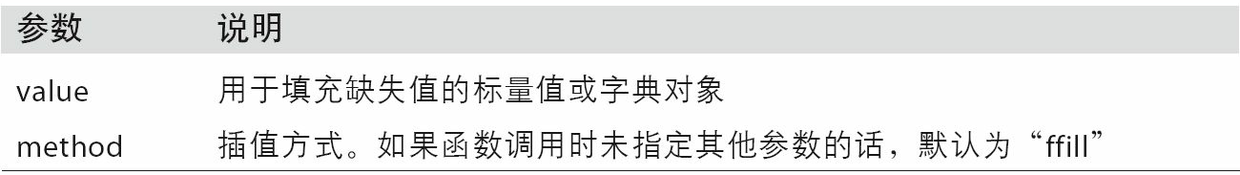

# 7.2 数据转换

## 移除重复数据

In [17]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [18]:
#DataFrame的duplicated方法返回一个布尔型Series，表示各行是否是重复行（前面出现过的行）：
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [19]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [20]:
#这两个方法默认会判断全部列，你也可以指定部分列进行重复项判断。假设我们还有一列值，且只希望根据k1列过滤重复项：
data['v1'] = range(7)
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


In [21]:
#duplicated和drop_duplicates默认保留的是第一个出现的值组合。传入keep='last'则保留最后一个：
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


## 利用函数或映射进行数据转换

In [23]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon', 'Pastrami', 'corned beef', 'Bacon', 'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}
lowercased = data['food'].str.lower()
data['animal'] = lowercased.map(meat_to_animal)
data
#data['food'].map(lambda x: meat_to_animal[x.lower()])

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


## 替换值

In [24]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data.replace([-999, -1000], [np.nan,0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [25]:
#传入的参数也可以是字典：
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

## 重命名轴索引

In [26]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])

In [27]:
transform = lambda x:x[:].upper()
data.index.map(transform)

Index(['OHIO', 'COLORADO', 'NEW YORK'], dtype='object')

In [28]:
data.rename(index={'OHIO': 'INDIANA'},
            columns={'three': 'peekaboo'})

,one,two,peekaboo,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


## 离散化和面元划分

In [29]:
#为了便于分析，连续数据常常被离散化或拆分为“面元”（bin）。假设有一组人员数据，而你希望将它们划分为不同的年龄组：
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
#接下来将这些数据划分为“18到25”、“26到35”、“35到60”以及“60以上”几个面元。
bins = [18, 25, 35, 60, 100]

cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [30]:
#它的底层含有一个表示不同分类名称的类型数组，以及一个codes属性中的年龄数据的标签：
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [31]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [32]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [33]:
#你可 以通过传递一个列表或数组到labels，设置自己的面元名称：
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

[Youth, Youth, Youth, YoungAdult, Youth, ..., YoungAdult, Senior, MiddleAged, MiddleAged, YoungAdult]
Length: 12
Categories (4, object): [Youth < YoungAdult < MiddleAged < Senior]

In [34]:
#如果向cut传入的是面元的数量而不是确切的面元边界，则它会根据数据的最小值和最大值计算等长面元。
data = np.random.rand(20)
#选项precision=2，限定小数只有两位。
pd.cut(data, 4, precision=2)

[(0.73, 0.96], (0.5, 0.73], (0.031, 0.26], (0.5, 0.73], (0.73, 0.96], ..., (0.5, 0.73], (0.5, 0.73], (0.031, 0.26], (0.5, 0.73], (0.73, 0.96]]
Length: 20
Categories (4, interval[float64]): [(0.031, 0.26] < (0.26, 0.5] < (0.5, 0.73] < (0.73, 0.96]]

In [35]:
#qcut是一个非常类似于cut的函数，它可以根据样本分位数对数据进行面元划分。根据数据的分布情况，cut可能无法使各个面元中含有相同数量的数据点。
#而qcut由于使用的是样本分位数，因此可以得到大小基本相等的面元：
data = np.random.randn(1000)
cats = pd.qcut(data, 4)
cats

[(0.0817, 0.658], (-2.8489999999999998, -0.651], (0.0817, 0.658], (0.658, 3.899], (-0.651, 0.0817], ..., (0.0817, 0.658], (-0.651, 0.0817], (-0.651, 0.0817], (0.658, 3.899], (-0.651, 0.0817]]
Length: 1000
Categories (4, interval[float64]): [(-2.8489999999999998, -0.651] < (-0.651, 0.0817] < (0.0817, 0.658] < (0.658, 3.899]]

In [36]:
pd.value_counts(cats)

(0.658, 3.899]                   250
(0.0817, 0.658]                  250
(-0.651, 0.0817]                 250
(-2.8489999999999998, -0.651]    250
dtype: int64

## 检查和过滤异常值

In [39]:
#要选出全部含有“超过3或－3的值”的行
data = pd.DataFrame(np.random.randn(1000, 4))
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
134,-0.664264,0.931440,-1.903958,3.009000
249,3.222279,-1.376078,-0.392859,-0.078878
523,-0.097767,-1.357018,-3.050893,-1.165406
549,0.357174,3.081586,0.211720,-1.278285
563,-0.113453,-3.785978,0.471783,-0.896802
589,2.031757,0.343499,3.346625,-0.132411
921,0.899330,3.128231,0.225174,-0.958635
954,-0.458113,0.768169,-0.252881,-3.055495
955,-0.138844,-3.648147,1.244567,-1.624669


根据这些条件，就可以对值进行设置。下面的代码可以将值限制在区间－3到3以内：

In [41]:
data[np.abs(data) > 3] = np.sign(data) * 3

## 排列和随机采样

In [42]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
sampler = np.random.permutation(5)
#以以下的索引顺序进行重新排列，即第0行变成第4行...
sampler

array([4, 1, 0, 2, 3])

In [43]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [44]:
df.take(sampler)

,0,1,2,3
4,16,17,18,19
1,4,5,6,7
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15


## 计算指标/哑变量

In [45]:
#如果DataFrame的某一列中含有k个不同的值，则可以派生出一个k列矩阵或DataFrame（其值全为1和0）。
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'], 'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [53]:
#有时候，你可能想给指标DataFrame的列加上一个前缀，以便能够跟其他数据进行合并。get_dummies的prefix参数可以实现该功能：
dummies = pd.get_dummies(df['key'], prefix='key')
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


一个对统计应用有用的秘诀是：结合get_dummies和诸如cut之类的离散化函数：

In [54]:
values = np.random.rand(10)
values

array([0.64471474, 0.96907461, 0.79067745, 0.32758071, 0.26044964,
       0.09624514, 0.55393423, 0.29388487, 0.34025143, 0.27013923])

In [55]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

   (0.0, 0.2]  (0.2, 0.4]  (0.4, 0.6]  (0.6, 0.8]  (0.8, 1.0]
0           0           0           0           1           0
1           0           0           0           0           1
2           0           0           0           1           0
3           0           1           0           0           0
4           0           1           0           0           0
5           1           0           0           0           0
6           0           0           1           0           0
7           0           1           0           0           0
8           0           1           0           0           0
9           0           1           0           0           0

# 7.3 字符串操作

## 字符串对象方法

In [56]:
#以逗号分隔的字符串可以用split拆分成数段：
val = 'a,b,  guido'
val.split(',')

['a', 'b', '  guido']

In [57]:
#split常常与strip一起使用，以去除空白符（包括换行符）：
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [58]:
first, second, third = pieces
first + '-' + second + '::' + third

'a-b::guido'

In [59]:
#一种更快更符合Python风格的方式是，向字符串"::"的join方法传入一个列表或元组：
'::'.join(pieces)

'a::b::guido'

In [60]:
#检测子串的最佳方式是利用Python的in关键字，还可以使用index和find：
'guido' in val

True

In [61]:
val.index(',')

1

In [62]:
#注意find和index的区别：如果找不到字符串，index将会引发一个异常（而不是返回－1）
val.find(':')

-1

In [63]:
#count可以返回指定子串的出现次数：
val.count(',')

2

In [64]:
#replace用于将指定模式替换为另一个模式。通过传入空字符串，它也常常用于删除模式：
 val.replace(',', '::')

'a::b::  guido'

In [65]:
val.replace(',', '')

'ab  guido'

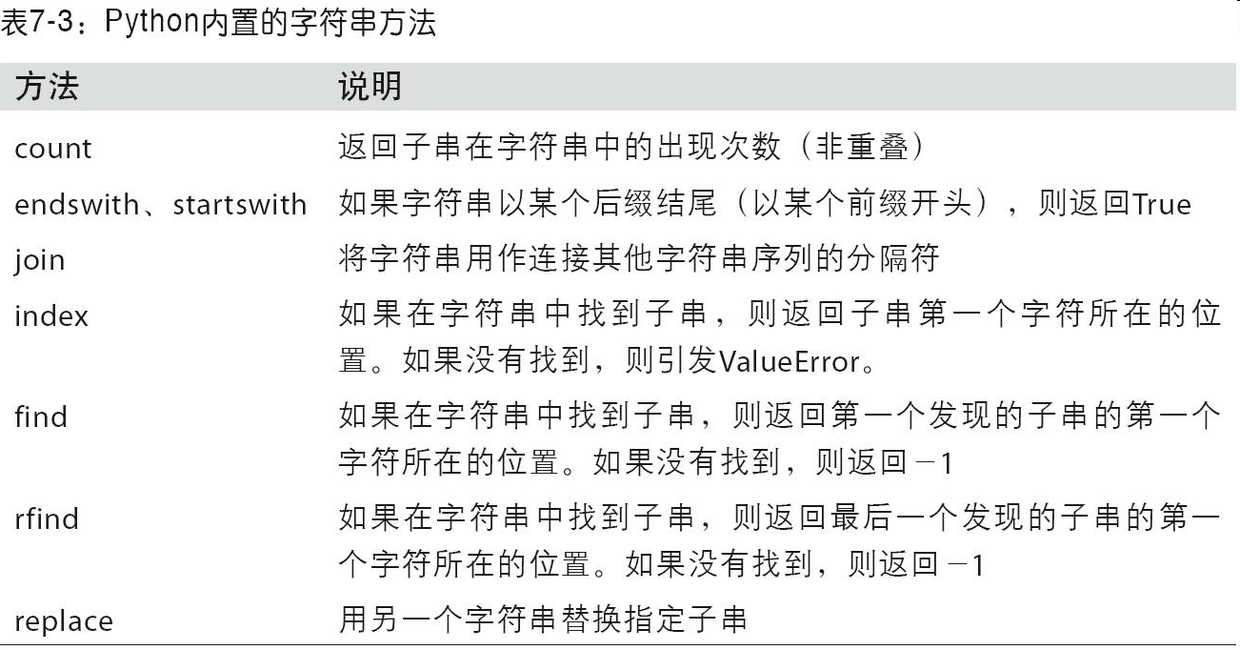

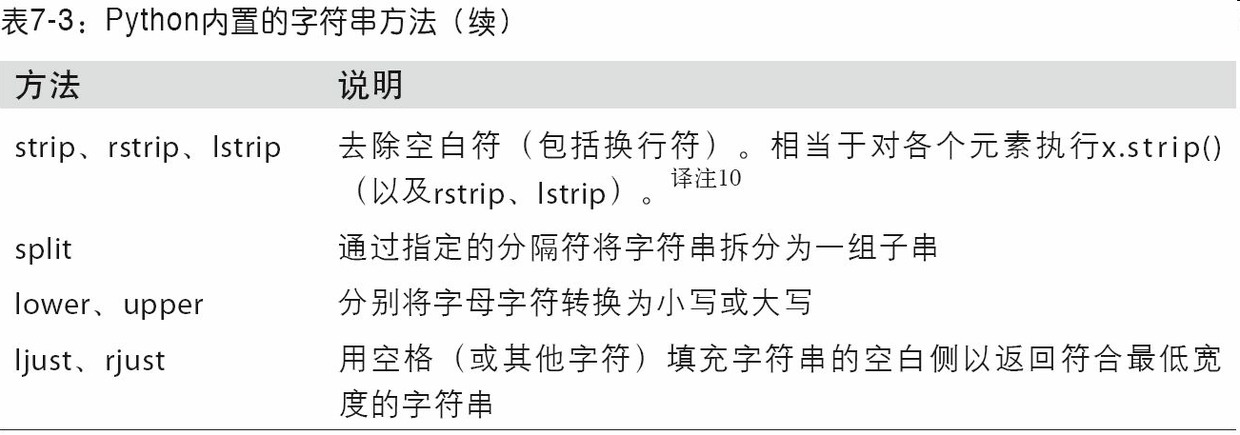

## 正则表达式

正则表达式提供了一种灵活的在文本中搜索或匹配（通常比前者复杂）字符串模式的方式。正则表达式，常称作regex，是根据正则表达式语言编写的字符串。Python内置的re模块负责对字符串应用正则表达式。

In [66]:
import re

re模块的函数可以分为三个大类：模式匹配、替换以及拆分。

In [69]:
#描述一个或多个空白符的regex是\s+：
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [70]:
#调用re.split('\s+',text)时，正则表达式会先被编译，然后再在text上调用其split方法。你可以用re.compile自己编译regex以得到一个可重用的regex对象:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [71]:
#只希望得到匹配regex的所有模式，则可以使用findall方法：
regex.findall(text)

['    ', '\t ', '  \t']

笔记：如果想避免正则表达式中不需要的转义（\），则可以使用原始字符串字面量如r'C:\x'（也可以编写其等价式'C:\x'）。

match和search跟findall功能类似。findall返回的是字符串中所有的匹配项，而search则只返回第一个匹配项。match更加严格，它只匹配字符串的首部。

In [72]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'
regex = re.compile(pattern, flags=re.IGNORECASE)
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [73]:
#search返回的是文本中第一个电子邮件地址（以特殊的匹配项对象形式返回）。
#对于上面那个regex，匹配项对象只能告诉我们模式在原字符串中的起始和结束位置：
m = regex.search(text)
text[m.start():m.end()]

'dave@google.com'

In [81]:
#re.search 扫描整个字符串并返回第一个成功的匹配。
re.search('www', 'www.runoob.com').span()  # 在起始位置匹配

(0, 3)

In [82]:
re.search('com', 'www.runoob.com').span()  # 不在起始位置匹配

(11, 14)

In [74]:
print(regex.match(text))

None


re.match 尝试从字符串的起始位置匹配一个模式，如果不是起始位置匹配成功的话，match()就返回none。
re.match(pattern, string, flags=0) pattern匹配的正则表达式  string要匹配的字符串

In [76]:
re.match('ww', 'www.runoob.com').span()  # 在起始位置匹配

(0, 2)

In [80]:
re.match('com', 'www.runoob.com')  # 不在起始位置匹配

line = "Cats are smarter than dogs"
matchObj = re.match(r'(.*) are (.*?) than (.*)', line, re.M | re.I)
if matchObj:
    print("matchObj.group() : ", matchObj.group()) #也可以group(0)
    print("matchObj.group(1) : ", matchObj.group(1))
    print("matchObj.group(2) : ", matchObj.group(2))
    print("matchObj.group(3) : ", matchObj.group(3))
else:
    print("No match!!")
'''
首先，这是一个字符串，前面的一个 r 表示字符串为非转义的原始字符串，让编译器忽略反斜杠，
也就是忽略转义字符。但是这个字符串里没有反斜杠，所以这个 r 可有可无。
(.*) 第一个匹配分组，.* 代表匹配除换行符之外的所有字符。
(.*?) 第二个匹配分组，.*? 后面多个问号，代表非贪婪模式，也就是说只匹配符合条件的最少字符
后面的一个 .* 没有括号包围，所以不是分组，匹配效果和第一个一样，但是不计入匹配结果中。
matchObj.group() 等同于 matchObj.group(0)，表示匹配到的完整文本字符
matchObj.group(1) 得到第一组匹配结果，也就是(.*)匹配到的
matchObj.group(2) 得到第二组匹配结果，也就是(.*?)匹配到的
'''

In [84]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

re.sub用于替换字符串中的匹配项。
re.sub(pattern, repl, string, count=0, flags=0)

In [75]:
#相关的，sub方法可以将匹配到的模式替换为指定字符串，并返回所得到的新字符串：
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



In [85]:
#sub还能通过诸如\1、\2之类的特殊符号访问各匹配项中的分组。符号\1对应第一个匹配的组，\2对应第二个匹配的组，以此类推：
print(regex.sub(r'Username: \1, Domain: \2, Suffix: \3', text))

Dave Username: dave, Domain: google, Suffix: com
Steve Username: steve, Domain: gmail, Suffix: com
Rob Username: rob, Domain: gmail, Suffix: com
Ryan Username: ryan, Domain: yahoo, Suffix: com



phone = "2004-959-559 # 这是一个国外电话号码"
删除字符串中的 Python注释
num = re.sub(r'#.*$', "", phone)
print("电话号码是: ", num)

删除非数字(-)的字符串
num = re.sub(r'\D', "", phone)
print("电话号码是 : ", num)

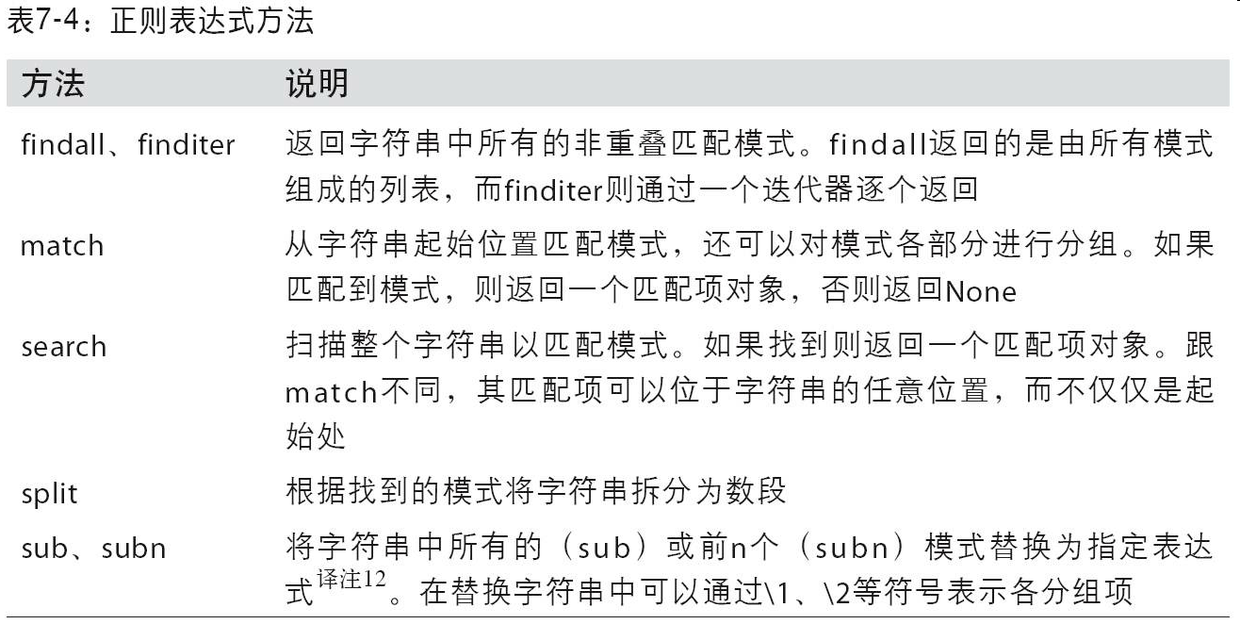

## pandas的矢量化字符串函数

In [86]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com','Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

通过data.map，所有字符串和正则表达式方法都能被应用于（传入lambda表达式或其他函数）各个值，但是如果存在NA（null）就会报错。为了解决这个问题，Series有一些能够跳过NA值的面向数组方法，进行字符串操作。通过Series的str属性即可访问这些方法。例如，我们可以通过str.contains检查各个电子邮件地址是否含有"gmail"：

In [87]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

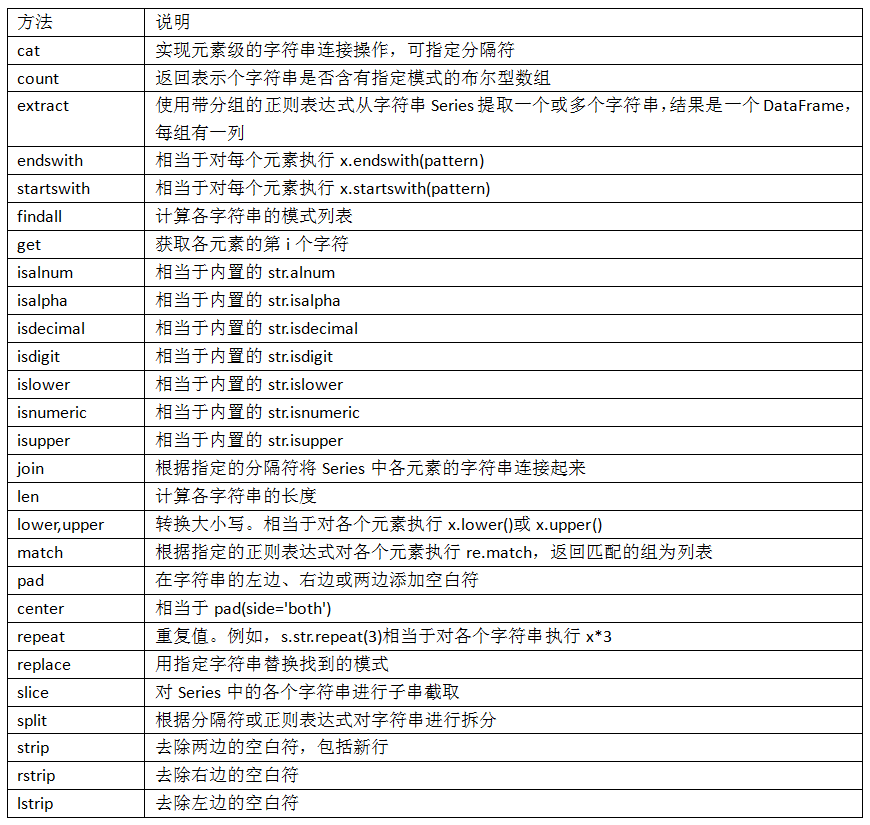